### Pontos de pivo para Daytrade
Uma estrategia basica para trading

OBS: Esse modelo Só é funcional para ativos com volatilidade superior a do IBOV, ativos de Beta baixo deverar consultar se compensa com os custo operacionais.

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
import yfinance
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
ativo = yfinance.Ticker("csna3.SA")
df = ativo.history(interval="5m", period = "1d")

# buscando series historias outro jeito mais simples
#df = pdr.DataReader('itub4.SA',data_source='yahoo', start='2020-02-28', end = '2020-04-02');
#df.tail()

In [4]:
df.iloc[-1].copy()

Open                26.080000
High                26.110001
Low                 26.059999
Close               26.110001
Volume          141900.000000
Dividends            0.000000
Stock Splits         0.000000
Name: 2021-10-25 15:55:00-03:00, dtype: float64

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-10-25 10:05:00-03:00,25.350000,25.590000,25.350000,25.530001,64200,0,0
2021-10-25 10:10:00-03:00,25.540001,25.549999,25.360001,25.410000,232100,0,0
2021-10-25 10:15:00-03:00,25.410000,25.490000,25.299999,25.340000,123900,0,0
2021-10-25 10:20:00-03:00,25.350000,25.370001,25.219999,25.340000,110800,0,0
2021-10-25 10:25:00-03:00,25.340000,25.389999,25.250000,25.270000,89500,0,0
...,...,...,...,...,...,...,...
2021-10-25 15:35:00-03:00,25.990000,26.030001,25.959999,26.000000,101100,0,0
2021-10-25 15:40:00-03:00,26.010000,26.080000,26.000000,26.059999,135500,0,0
2021-10-25 15:45:00-03:00,26.059999,26.090000,26.049999,26.059999,97400,0,0


### Agora vamos para a formula do pivot point
Fonte:
https://www.mql5.com/pt/code/95

Resistência 3 = High + 2*(Pivot - Low)

Resistência 2 = Pivot + (R1 - S1)

Resistência 1 = 2 * Pivot - Low

Pontos Pivô = ( High + Close + Low )/3

Suporte 1 = 2 * Pivot - High

Suporte 2 = Pivot - (R1 - S1)

Suporte 3 = Low - 2*(High - Pivot)


In [18]:
df['Pivot'] = (df['High'] + df['Low'] + df['Close'])/3
df['R1'] = 2*df['Pivot'] - df['Low']
df['S1'] = 2*df['Pivot'] - df['High']
df['R2'] = df['Pivot'] + (df['High'] - df['Low'])
df['S2'] = df['Pivot'] - (df['High'] - df['Low'])
df['R3'] = df['Pivot'] + 2*(df['High'] - df['Low'])
df['S3'] = df['Pivot'] - 2*(df['High'] - df['Low'])


In [93]:
#exportar data frame
#df.to_excel('csna3.xlsx')

### Generalizando para todos os daods


In [94]:
#Codigo para exclução de colunas 
#df =df.drop(columns=[('')])

In [17]:
#visualizando DF
df.tail()

In [10]:
#criando colulas vazias no data frema
df['Compra pivot'],df['Venda S1'],df['Acumulado'] = 'NaN','NaN','NaN'

In [97]:
#copiando dataframe para poder fazer os calculos
#dfcalc = df.copy()

In [98]:
#excluindo primeira linha do df para poder usar como inicio o comparador do outro df calc vou excluir apenas com um filtro
#df = df.loc[df.index > '2020-01-02']

In [29]:
df = df.tail()

## Fim de teste de loops
tudo abaixo pode ser execultado 

In [30]:
print(len(df['Pivot']))

5


In [31]:
print('Anterior:')
print(df['Pivot'][0])
print('Último:')
print(df['Pivot'][-1])

Anterior:
25.996666590372723
Último:
26.093333562215168


In [34]:
#criando valores de lucro na entrada comprando no Pivot
posicao = 0
while posicao < len(df['Pivot']):
    if df['High'][posicao] > df['Pivot'][posicao - 1]:#penultimo MAIOR que ultimo
        df['Compra pivot'][posicao] = df['Close'][posicao] - df['Pivot'][posicao - 1]
    else:
        df['Compra pivot'][posicao] = 0
    posicao = posicao +1;


In [35]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,R2,S2,R3,S3,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,,,,,
2021-10-25 15:35:00-03:00,25.990000,26.030001,25.959999,26.000000,101100,0,0,25.996667,26.033334,25.963332,26.066668,25.926665,26.136670,25.856663,0,NaN,NaN
2021-10-25 15:40:00-03:00,26.010000,26.080000,26.000000,26.059999,135500,0,0,26.046666,26.093333,26.013333,26.126666,25.966667,26.206666,25.886667,0.063333,NaN,NaN
2021-10-25 15:45:00-03:00,26.059999,26.090000,26.049999,26.059999,97400,0,0,26.066666,26.083333,26.043332,26.106667,26.026665,26.146668,25.986664,0.013333,NaN,NaN
2021-10-25 15:50:00-03:00,26.080000,26.120001,26.010000,26.080000,158900,0,0,26.070000,26.130000,26.020000,26.180001,25.960000,26.290002,25.849999,0.013334,NaN,NaN
2021-10-25 15:55:00-03:00,26.080000,26.110001,26.059999,26.110001,141900,0,0,26.093334,26.126668,26.076667,26.143335,26.043332,26.193336,25.993331,0.04,NaN,NaN


In [37]:
#criando valores de lucro na entrada vendido na Primeiro Suporte
posicao = 0
while posicao < len(df['S1']):
    if df['Low'][posicao] < df['S1'][posicao - 1]:
        df['Venda S1'][posicao] = df['S1'][posicao - 1] - df['Close'][posicao]
    else:
        df['Venda S1'][posicao] = 0
    posicao = posicao +1;


In [38]:
# SOMANDO SO RESULTADOS DOS GANHOS DAS ENTRADAS DE UM LOTE MINIMO DE 100 AÇOES- COMPRA E VENDA; 
for index, row in df.iterrows():
    df.loc[index,'Acumulado'] = (df.loc[index,'Compra pivot'] + df.loc[index,'Venda S1'])*100;

In [39]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,R2,S2,R3,S3,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,,,,,
2021-10-25 15:35:00-03:00,25.990000,26.030001,25.959999,26.000000,101100,0,0,25.996667,26.033334,25.963332,26.066668,25.926665,26.136670,25.856663,0,0.076667,7.666651
2021-10-25 15:40:00-03:00,26.010000,26.080000,26.000000,26.059999,135500,0,0,26.046666,26.093333,26.013333,26.126666,25.966667,26.206666,25.886667,0.063333,0,6.333288
2021-10-25 15:45:00-03:00,26.059999,26.090000,26.049999,26.059999,97400,0,0,26.066666,26.083333,26.043332,26.106667,26.026665,26.146668,25.986664,0.013333,0,1.3333
2021-10-25 15:50:00-03:00,26.080000,26.120001,26.010000,26.080000,158900,0,0,26.070000,26.130000,26.020000,26.180001,25.960000,26.290002,25.849999,0.013334,-0.036668,-2.333387
2021-10-25 15:55:00-03:00,26.080000,26.110001,26.059999,26.110001,141900,0,0,26.093334,26.126668,26.076667,26.143335,26.043332,26.193336,25.993331,0.04,0,4.000028


In [42]:
#excluindo primeira linha do df usar como inicio do comparador - SE NAO VC TEM UM ENTRADA COM O PARAMENTRO DO ULTIMO DIA
# E ISSO IRIA MUDAR O VALOR NA SOMATORIA TOTAL
#df = df.loc[df.index > '2020-10-20 10:10:00']
df = df.loc[df.index > '2021-10-25 15:36:00']

In [43]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,R2,S2,R3,S3,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,,,,,
2021-10-25 15:40:00-03:00,26.010000,26.080000,26.000000,26.059999,135500,0,0,26.046666,26.093333,26.013333,26.126666,25.966667,26.206666,25.886667,0.063333,0,6.333288
2021-10-25 15:45:00-03:00,26.059999,26.090000,26.049999,26.059999,97400,0,0,26.066666,26.083333,26.043332,26.106667,26.026665,26.146668,25.986664,0.013333,0,1.3333
2021-10-25 15:50:00-03:00,26.080000,26.120001,26.010000,26.080000,158900,0,0,26.070000,26.130000,26.020000,26.180001,25.960000,26.290002,25.849999,0.013334,-0.036668,-2.333387
2021-10-25 15:55:00-03:00,26.080000,26.110001,26.059999,26.110001,141900,0,0,26.093334,26.126668,26.076667,26.143335,26.043332,26.193336,25.993331,0.04,0,4.000028


<AxesSubplot:xlabel='Datetime'>

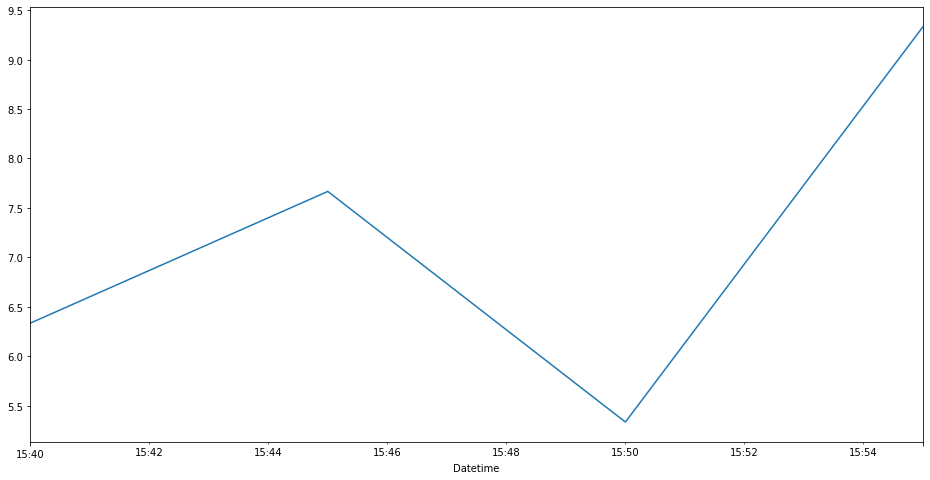

In [44]:
np.cumsum(df['Acumulado']).plot(figsize = (16,8))